In [4]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pa.read_csv("Crop_recommendation2.csv")
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
print(df.shape)

(2200, 8)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
print(df.describe()) #Les statistiques

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [ ]:
print(df.duplicated().sum()) #Pour voir combien les colonnes répétés

0


In [ ]:
print(df['N'].mean()) #La moyenne de N

50.551818181818184


In [ ]:
print(df['K'].mean())

48.14909090909091


In [ ]:
print(df['P'].mean())

53.36272727272727


In [ ]:
print(df['temperature'].mean())

25.616243851779544


In [ ]:
print(df['humidity'].mean())

71.48177921778637


In [ ]:
print(df['ph'].mean())

6.469480065256364


In [ ]:
print(df['rainfall'].mean())

103.46365541576817


In [ ]:
print(df['label'].unique)

<bound method Series.unique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>


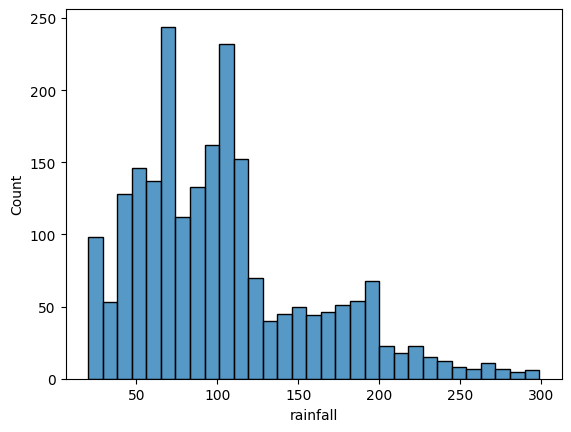

In [ ]:
sns.histplot(data=df, x='rainfall')

# Afficher le graphique
plt.show()

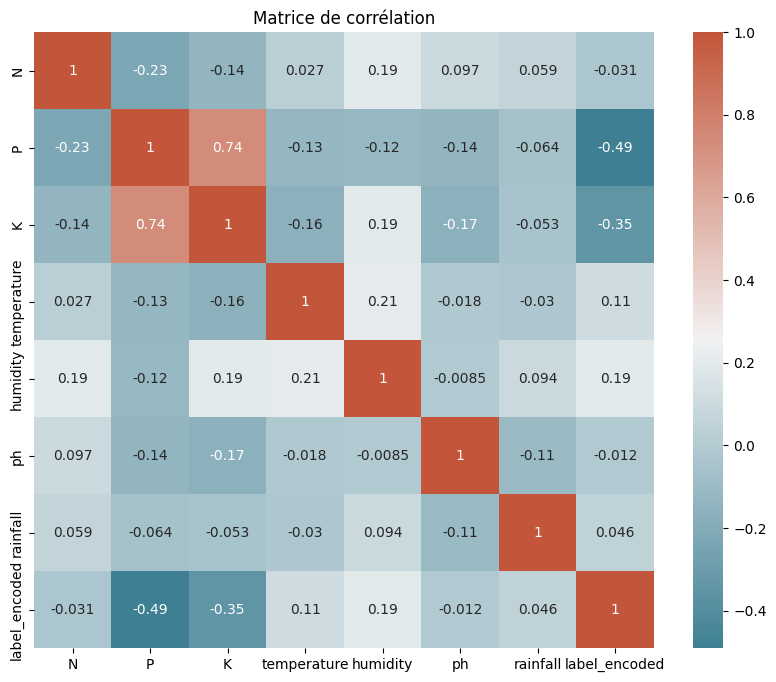

In [8]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
# Afficher la heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Matrice de corrélation')
plt.show()


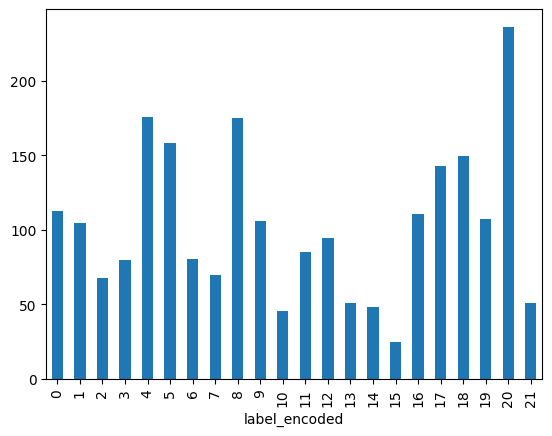

In [9]:
df_genre_rev=df.groupby(['label_encoded'])['rainfall'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

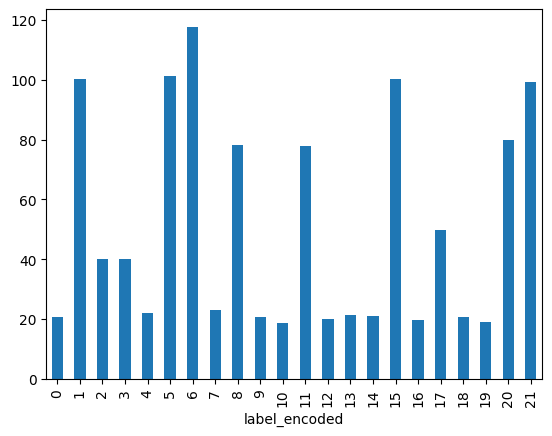

In [ ]:
df_genre_rev=df.groupby(['label_encoded'])['N'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

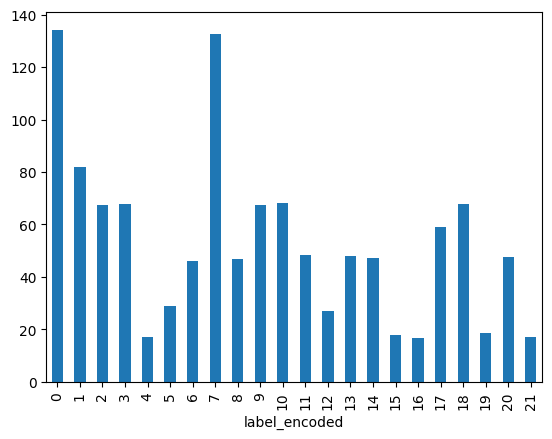

In [ ]:
df_genre_rev=df.groupby(['label_encoded'])['P'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

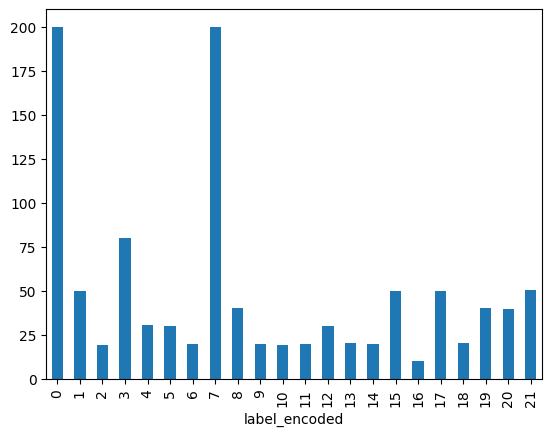

In [10]:
df_genre_rev=df.groupby(['label_encoded'])['K'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

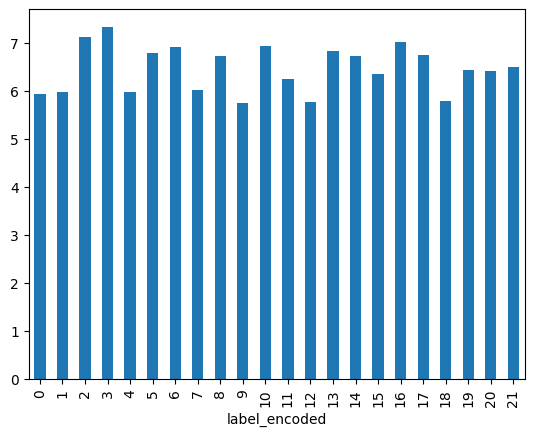

In [11]:
df_genre_rev=df.groupby(['label_encoded'])['ph'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

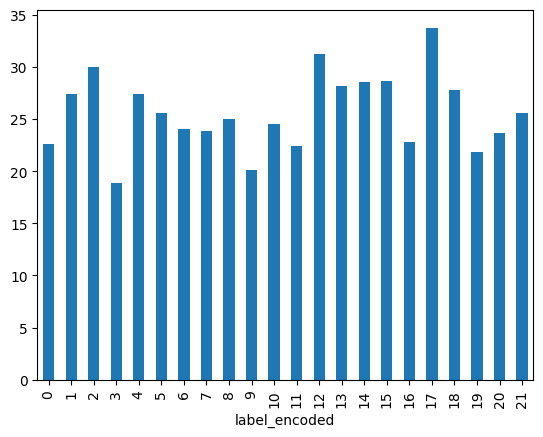

In [12]:
df_genre_rev=df.groupby(['label_encoded'])['temperature'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

In [13]:
df_genre_rev=df.groupby(['label_encoded'])['humidity'].mean()
df_genre_rev.plot(kind='bar')
plt.show()

KeyError: 'label_encoded'

In [ ]:
#**************Partie ACP*************
X = df.drop(columns=['label'])
y = df['label']
# Standardiser les variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)
principal_df = pa.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Ajouter la cible au DataFrame des composantes principales
principal_df['label'] = y

# Afficher les composantes principales
print(principal_df.head())


        PC1       PC2       PC3       PC4       PC5 label
0 -0.582869 -0.844586  1.373343 -1.614129  0.308224  rice
1 -0.474635 -0.784895  1.252178 -1.792762  1.107745  rice
2 -0.634068 -0.694522  1.179332 -1.818106  2.523263  rice
3 -1.047920 -1.087658  1.393351 -0.982401  1.448781  rice
4 -0.873258 -0.658673  1.455685 -2.335012  1.959633  rice


In [ ]:
# Contribution de chaque individu pour le 1er Axe
indiv_contrib_axe = pca.transform(X_scaled) ** 2 / np.sum(pca.transform(X_scaled) ** 2, axis=0)

# Coordonnées des individus sur chaque axe
indiv_coord_axe = pca.transform(X_scaled)

# Contribution de chaque variable pour chaque axe
var_contrib_axe = pca.components_ ** 2 / np.sum(pca.components_ ** 2, axis=1).reshape(-1, 1)

# Coordonnées des variables sur chaque axe
var_coord_axe = pca.components_

# Axe 1
t1 = indiv_contrib_axe[:, 0]
sorted_t1_indices = np.argsort(t1)[::-1]
sorted_t1_values = t1[sorted_t1_indices]
indiv_coord_axe_1 = indiv_coord_axe[:, 0]
var_contrib_axe_1 = var_contrib_axe[0]
var_coord_axe_1 = var_coord_axe[0]

# Affichage des résultats
print("Contribution de chaque individu sur l'axe 1:")
print(sorted_t1_values)
print("Coordonnées des individus sur l'axe 1:")
print(indiv_coord_axe_1)
print("Contribution de chaque variable sur l'axe 1:")
print(var_contrib_axe_1)
print("Coordonnées des variables sur l'axe 1:")
print(var_coord_axe_1)





Contribution de chaque individu sur l'axe 1:
[5.42361571e-03 5.35489291e-03 5.04074618e-03 ... 5.20390960e-10
 3.03248376e-10 1.83116850e-10]
Coordonnées des individus sur l'axe 1:
[-0.58286944 -0.47463491 -0.63406838 ... -1.15838352 -1.21918792
 -1.3730036 ]
Contribution de chaque variable sur l'axe 1:
[0.09131937 0.41446128 0.38763971 0.04512582 0.00468998 0.051503
 0.00526084]
Coordonnées des variables sur l'axe 1:
[-0.30219096  0.64378667  0.62260719 -0.21242839 -0.06848339 -0.22694272
 -0.07253163]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Axe 2
t2 = indiv_contrib_axe[:, 1]
sorted_t2_indices = np.argsort(t2)[::-1]
sorted_t2_values = t2[sorted_t2_indices]
indiv_coord_axe_2 = indiv_coord_axe[:, 1]
var_contrib_axe_2 = var_contrib_axe[1]
var_coord_axe_2 = var_coord_axe[1]

# Affichage des résultats
print("Contribution de chaque individu sur l'axe 2:")
print(sorted_t2_values)
print("Coordonnées des individus sur l'axe 2:")
print(indiv_coord_axe_2)
print("Contribution de chaque variable sur l'axe 2:")
print(var_contrib_axe_2)
print("Coordonnées des variables sur l'axe 2:")
print(var_coord_axe_2)


Contribution de chaque individu sur l'axe 2:
[3.42434159e-03 3.39769664e-03 3.37245219e-03 ... 1.25619834e-09
 9.54886136e-10 2.19110292e-10]
Coordonnées des individus sur l'axe 2:
[-0.84458562 -0.78489453 -0.69452246 ... -0.64047494  0.05238989
  0.05581764]
Contribution de chaque variable sur l'axe 2:
[0.11162744 0.00118048 0.08055901 0.12923078 0.54452095 0.04868968
 0.08419166]
Coordonnées des variables sur l'axe 2:
[-0.33410693 -0.03435809 -0.2838292  -0.35948683 -0.73791663  0.22065738
 -0.290158  ]


In [ ]:
# Axe 3
t3 = indiv_contrib_axe[:, 2]
sorted_t3_indices = np.argsort(t3)[::-1]
sorted_t3_values = t3[sorted_t3_indices]
indiv_coord_axe_3 = indiv_coord_axe[:, 2]
var_contrib_axe_3 = var_contrib_axe[2]
var_coord_axe_3 = var_coord_axe[2]

# Affichage des résultats
print("Contribution de chaque individu sur l'axe 3:")
print(sorted_t3_values)
print("Coordonnées des individus sur l'axe 3:")
print(indiv_coord_axe_3)
print("Contribution de chaque variable sur l'axe 3:")
print(var_contrib_axe_3)
print("Coordonnées des variables sur l'axe 3:")
print(var_coord_axe_3)


Contribution de chaque individu sur l'axe 3:
[4.65566488e-03 4.25209214e-03 4.19670173e-03 ... 9.47672506e-09
 4.08008937e-09 6.21425773e-10]
Coordonnées des individus sur l'axe 3:
[1.37334307 1.2521779  1.17933163 ... 1.0458397  0.18085534 0.50065432]
Contribution de chaque variable sur l'axe 3:
[0.01255408 0.01208661 0.02662553 0.06161712 0.04562457 0.30087451
 0.54061758]
Coordonnées des variables sur l'axe 3:
[-0.11204501 -0.10993913 -0.1631733  -0.24822796 -0.21359908 -0.54852029
  0.73526701]


In [ ]:
# Axe 4
t4 = indiv_contrib_axe[:, 3]
sorted_t4_indices = np.argsort(t4)[::-1]
sorted_t4_values = t4[sorted_t4_indices]
indiv_coord_axe_4 = indiv_coord_axe[:, 3]
var_contrib_axe_4 = var_contrib_axe[3]
var_coord_axe_4 = var_coord_axe[3]

# Affichage des résultats
print("Contribution de chaque individu sur l'axe 4:")
print(sorted_t4_values)
print("Coordonnées des individus sur l'axe 4:")
print(indiv_coord_axe_4)
print("Contribution de chaque variable sur l'axe 4:")
print(var_contrib_axe_4)
print("Coordonnées des variables sur l'axe 4:")
print(var_coord_axe_4)


Contribution de chaque individu sur l'axe 4:
[4.70177575e-03 4.64199765e-03 4.61643422e-03 ... 7.24603683e-10
 4.83814544e-10 1.07177429e-11]
Coordonnées des individus sur l'axe 4:
[-1.61412918 -1.79276217 -1.81810554 ... -1.30184105 -0.99049868
 -1.21922987]
Contribution de chaque variable sur l'axe 4:
[0.29338536 0.00214306 0.02398382 0.47724124 0.004512   0.15657886
 0.04215567]
Coordonnées des variables sur l'axe 4:
[-0.54165059 -0.04629318 -0.15486709  0.69082649 -0.0671714  -0.39570047
 -0.20531846]


In [ ]:
# Axe 5
t5 = indiv_contrib_axe[:, 4]
sorted_t5_indices = np.argsort(t5)[::-1]
sorted_t5_values = t5[sorted_t5_indices]
indiv_coord_axe_5 = indiv_coord_axe[:, 4]
var_contrib_axe_5 = var_contrib_axe[4]
var_coord_axe_5 = var_coord_axe[4]

# Affichage des résultats
print("Contribution de chaque individu sur l'axe 5:")
print(sorted_t5_values)
print("Coordonnées des individus sur l'axe 5:")
print(indiv_coord_axe_5)
print("Contribution de chaque variable sur l'axe 5:")
print(var_contrib_axe_5)
print("Coordonnées des variables sur l'axe 5:")
print(var_coord_axe_5)


Contribution de chaque individu sur l'axe 5:
[5.21473132e-03 5.19423058e-03 4.78916460e-03 ... 2.72986244e-09
 1.09406472e-09 1.68769977e-10]
Coordonnées des individus sur l'axe 5:
[ 0.30822369  1.10774485  2.52326331 ... -0.49176455 -0.60138842
 -0.34635114]
Contribution de chaque variable sur l'axe 5:
[0.25784526 0.00677842 0.0011172  0.0239833  0.01660782 0.42494823
 0.26871977]
Coordonnées des variables sur l'axe 5:
[-0.50778466  0.08233115  0.03342452  0.15486542  0.12887133  0.65188053
  0.51838188]


In [ ]:
#******************La qualité des individus*****************

Qualité des individus sur le plan 1 par rapport aux axes 1 et 2:
[5.42401280e-03 5.35606819e-03 5.27780173e-03 ... 1.55411252e-06
 1.27774672e-06 6.59086786e-07]


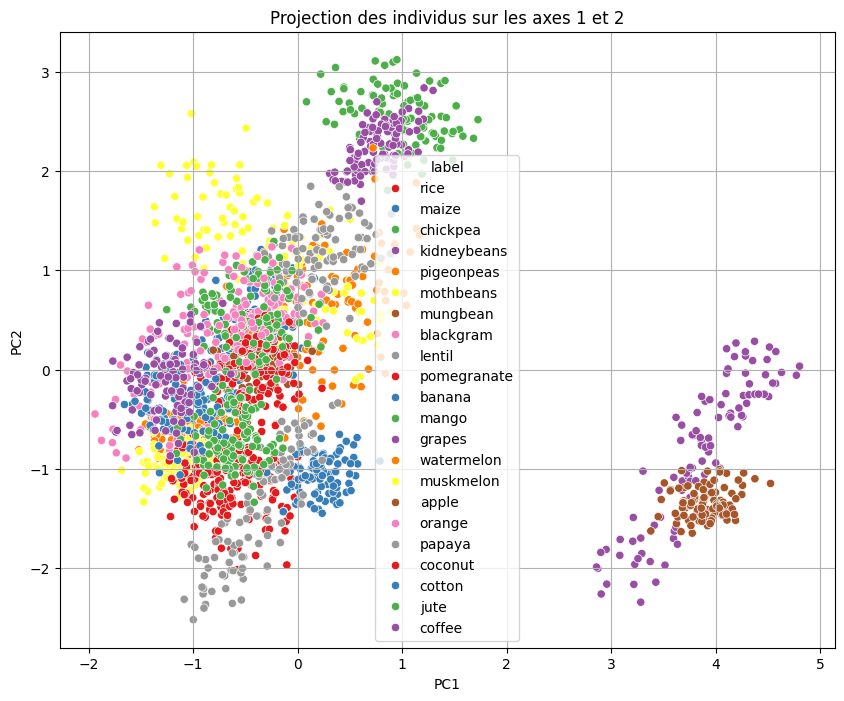

In [ ]:
# Qualité des individus sur le plan 1 par rapport aux axes 1 et 2
q12 = indiv_contrib_axe[:, 0] + indiv_contrib_axe[:, 1]

# Trier les valeurs par ordre décroissant
sorted_q12_indices = np.argsort(q12)[::-1]
sorted_q12_values = q12[sorted_q12_indices]

# Affichage des résultats
print("Qualité des individus sur le plan 1 par rapport aux axes 1 et 2:")
print(sorted_q12_values)

# Pour afficher le graphe des individus sur les axes 1 et 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individus sur les axes 1 et 2')
plt.grid(True)
plt.show()


Qualité des individus sur le plan 1 par rapport aux axes 1 et 3:
[5.42618070e-03 5.36466933e-03 5.05113197e-03 ... 1.43582770e-06
 1.08026871e-06 2.72634976e-07]


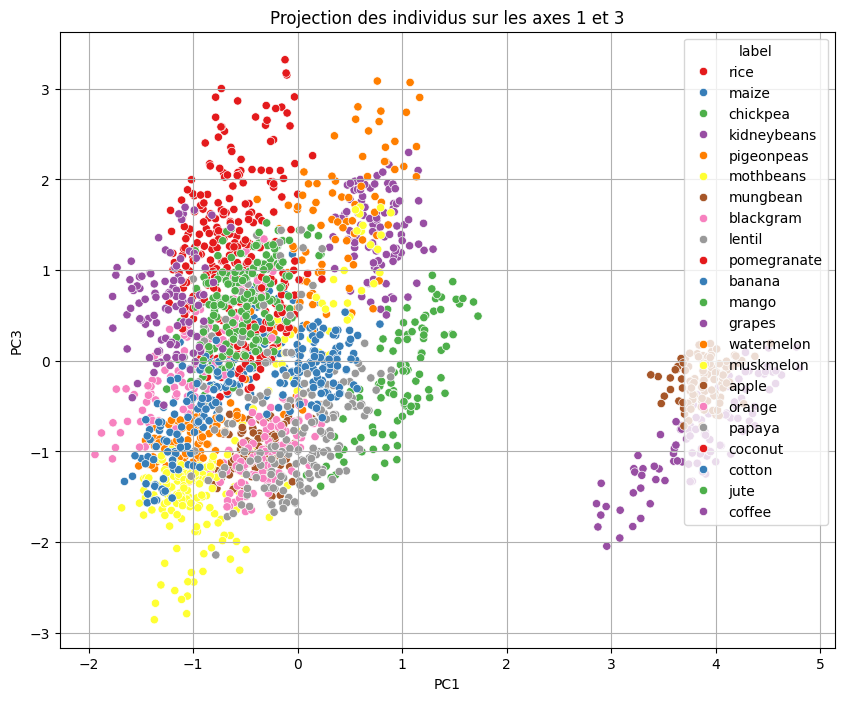

In [ ]:
# Qualité des individus sur le plan 1 par rapport aux axes 1 et 3
q13 = indiv_contrib_axe[:, 0] + indiv_contrib_axe[:, 2]

# Trier les valeurs par ordre décroissant
sorted_q13_indices = np.argsort(q13)[::-1]
sorted_q13_values = q13[sorted_q13_indices]

# Affichage des résultats
print("Qualité des individus sur le plan 1 par rapport aux axes 1 et 3:")
print(sorted_q13_values)

# Pour afficher le graphe des individus sur les axes 1 et 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC3'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Projection des individus sur les axes 1 et 3')
plt.grid(True)
plt.show()


Qualité des individus sur le plan 1 par rapport aux axes 1 et 4:
[7.23101685e-03 7.20535344e-03 6.72371992e-03 ... 2.97250257e-07
 1.37686884e-07 5.85033267e-08]


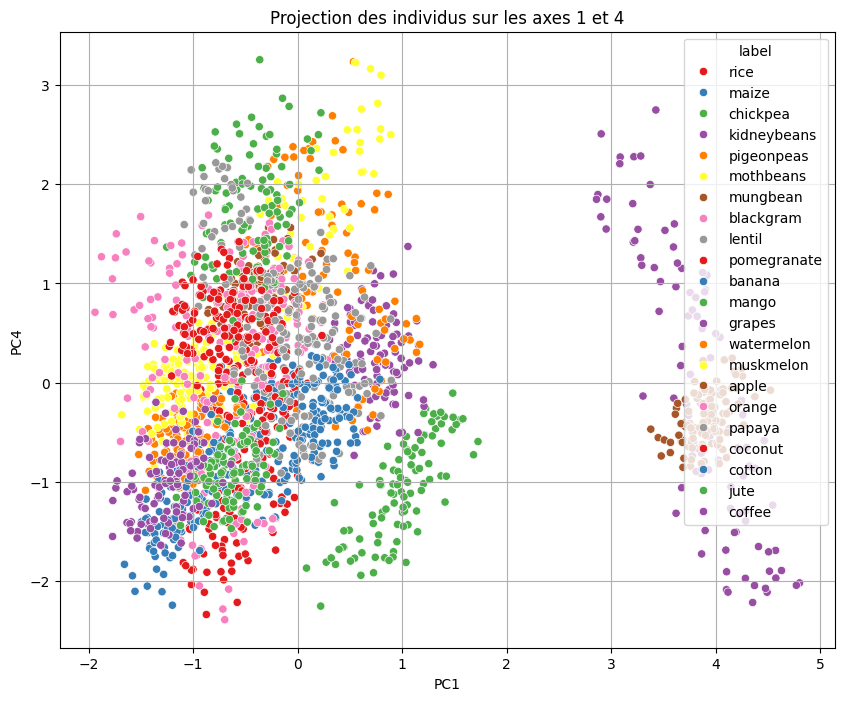

In [ ]:
# Qualité des individus sur le plan 1 par rapport aux axes 1 et 4
q14 = indiv_contrib_axe[:, 0] + indiv_contrib_axe[:, 3]

# Trier les valeurs par ordre décroissant
sorted_q14_indices = np.argsort(q14)[::-1]
sorted_q14_values = q14[sorted_q14_indices]

# Affichage des résultats
print("Qualité des individus sur le plan 1 par rapport aux axes 1 et 4:")
print(sorted_q14_values)

# Pour afficher le graphe des individus sur les axes 1 et 4
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC4'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('Projection des individus sur les axes 1 et 4')
plt.grid(True)
plt.show()


Qualité des individus sur le plan 1 par rapport aux axes 1 et 5:
[5.91700356e-03 5.69374216e-03 5.45815601e-03 ... 6.33349137e-07
 3.60747963e-07 2.81309034e-07]


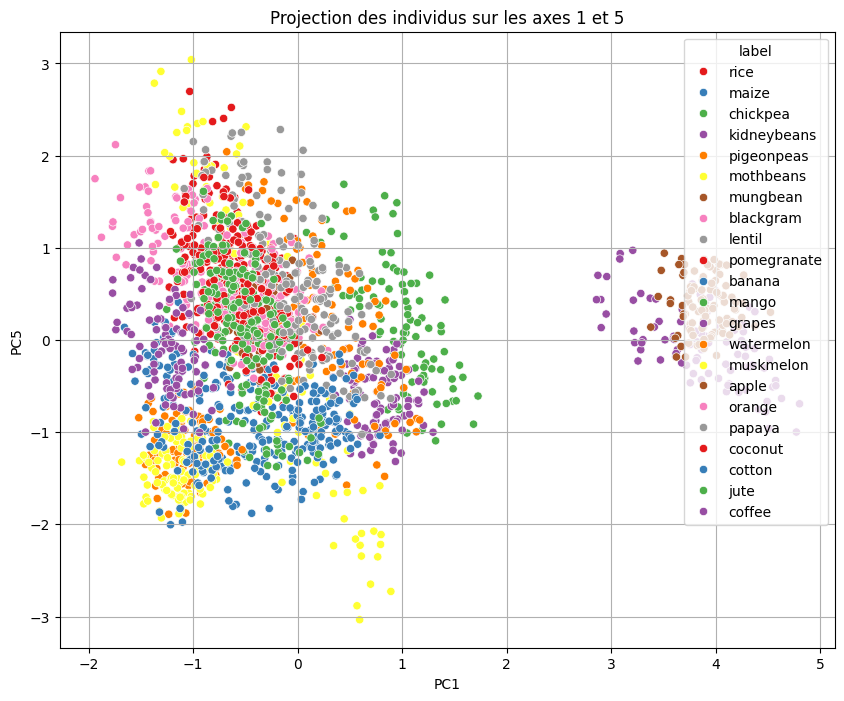

In [ ]:
# Qualité des individus sur le plan 1 par rapport aux axes 1 et 5
q15 = indiv_contrib_axe[:, 0] + indiv_contrib_axe[:, 4]

# Trier les valeurs par ordre décroissant
sorted_q15_indices = np.argsort(q15)[::-1]
sorted_q15_values = q15[sorted_q15_indices]

# Affichage des résultats
print("Qualité des individus sur le plan 1 par rapport aux axes 1 et 5:")
print(sorted_q15_values)

# Pour afficher le graphe des individus sur les axes 1 et 5
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC5'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('Projection des individus sur les axes 1 et 5')
plt.grid(True)
plt.show()


In [ ]:
#********************************Qualité des variables *********************************

Qualité des variables sur le plan 1 par rapport aux axes 1 et 2:
[0.50578066 0.11280792 0.0246407  0.29552842 0.26462368]


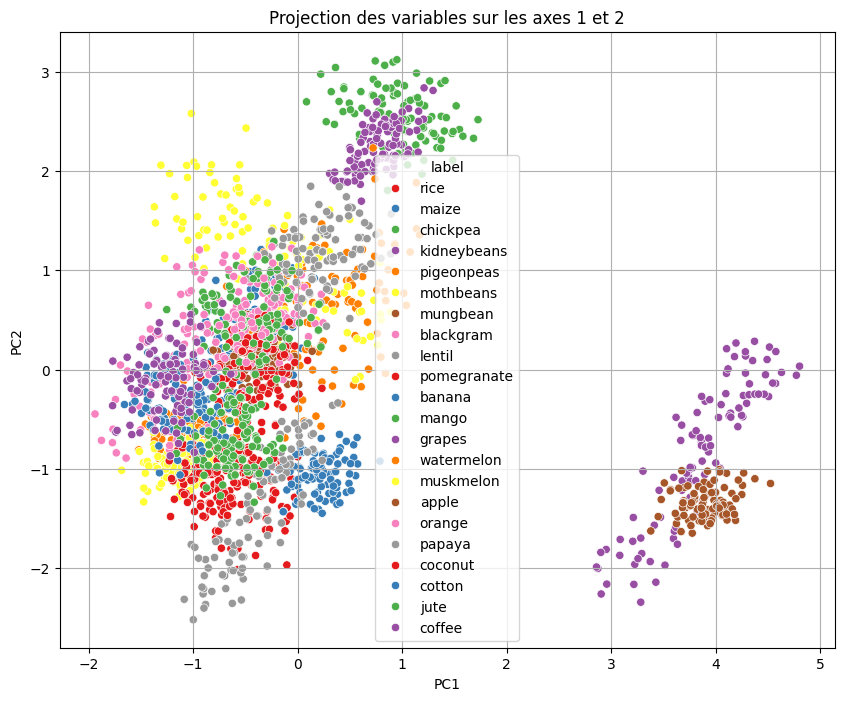

In [ ]:
# Qualité des variables sur le plan 1 par rapport aux axes 1 et 2
qv12 = var_contrib_axe[:, 0] + var_contrib_axe[:, 1]

# Affichage de la qualité des variables sur le plan 1 par rapport aux axes 1 et 2
print("Qualité des variables sur le plan 1 par rapport aux axes 1 et 2:")
print(qv12)

# Pour afficher le graphe des variables sur les axes 1 et 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des variables sur les axes 1 et 2')
plt.grid(True)
plt.show()


Qualité des variables sur le plan 1 par rapport aux axes 1 et 3:
[0.47895909 0.19218645 0.03917961 0.31736918 0.25896246]


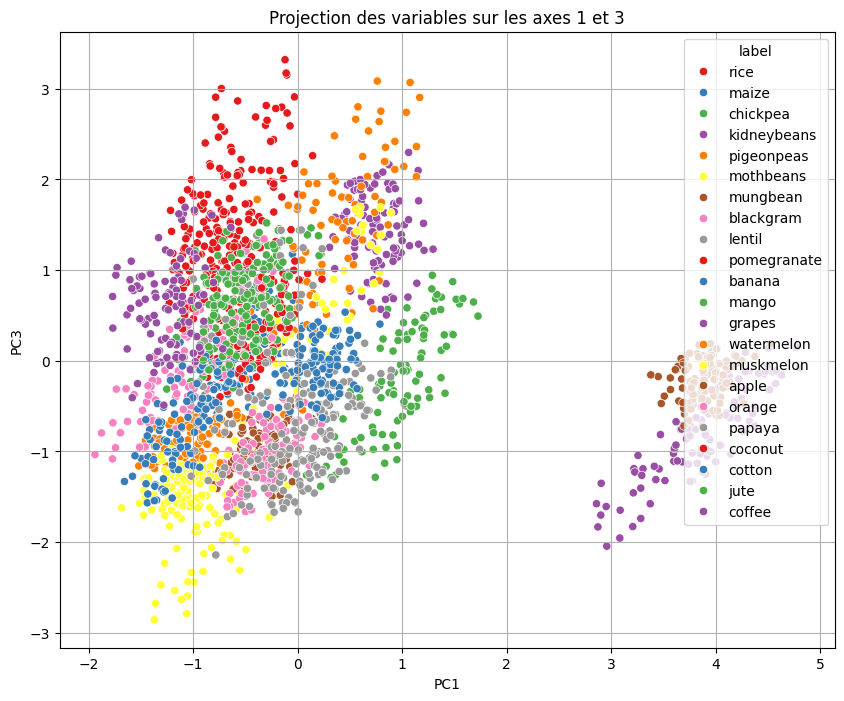

In [ ]:
# Qualité des variables sur le plan 1 par rapport aux axes 1 et 3
qv13 = var_contrib_axe[:, 0] + var_contrib_axe[:, 2]

# Affichage de la qualité des variables sur le plan 1 par rapport aux axes 1 et 3
print("Qualité des variables sur le plan 1 par rapport aux axes 1 et 3:")
print(qv13)

# Pour afficher le graphe des variables sur les axes 1 et 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC3'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Projection des variables sur les axes 1 et 3')
plt.grid(True)
plt.show()


Qualité des variables sur le plan 1 par rapport aux axes 1 et 4:
[0.13644519 0.24085822 0.0741712  0.7706266  0.28182856]


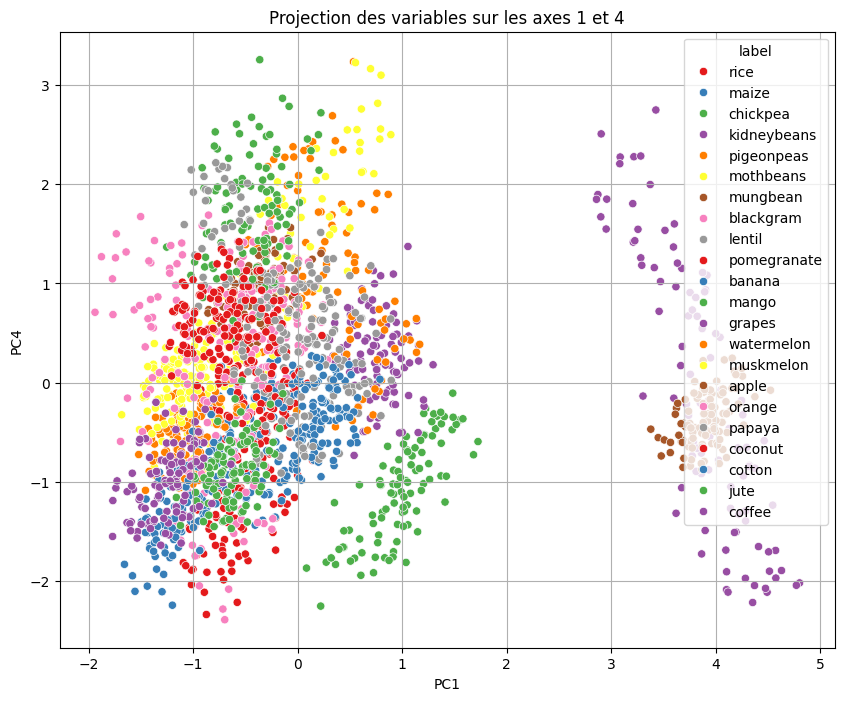

In [ ]:
# Qualité des variables sur le plan 1 par rapport aux axes 1 et 4
qv14 = var_contrib_axe[:, 0] + var_contrib_axe[:, 3]

# Affichage de la qualité des variables sur le plan 1 par rapport aux axes 1 et 4
print("Qualité des variables sur le plan 1 par rapport aux axes 1 et 4:")
print(qv14)

# Pour afficher le graphe des variables sur les axes 1 et 4
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC4'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('Projection des variables sur les axes 1 et 4')
plt.grid(True)
plt.show()


Qualité des variables sur le plan 1 par rapport aux axes 1 et 5:
[0.09600935 0.65614839 0.05817865 0.29789736 0.27445308]


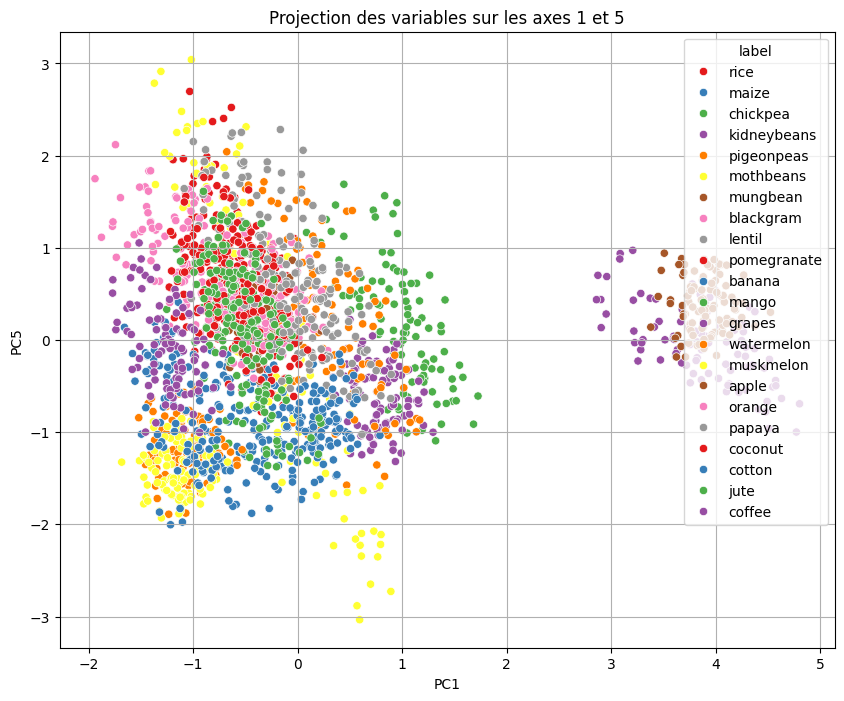

In [ ]:
# Qualité des variables sur le plan 1 par rapport aux axes 1 et 5
qv15 = var_contrib_axe[:, 0] + var_contrib_axe[:, 4]

# Affichage de la qualité des variables sur le plan 1 par rapport aux axes 1 et 5
print("Qualité des variables sur le plan 1 par rapport aux axes 1 et 5:")
print(qv15)

# Pour afficher le graphe des variables sur les axes 1 et 5
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC5'], hue=principal_df['label'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('Projection des variables sur les axes 1 et 5')
plt.grid(True)
plt.show()


In [ ]:
#*****************************Représentation graphique********************************

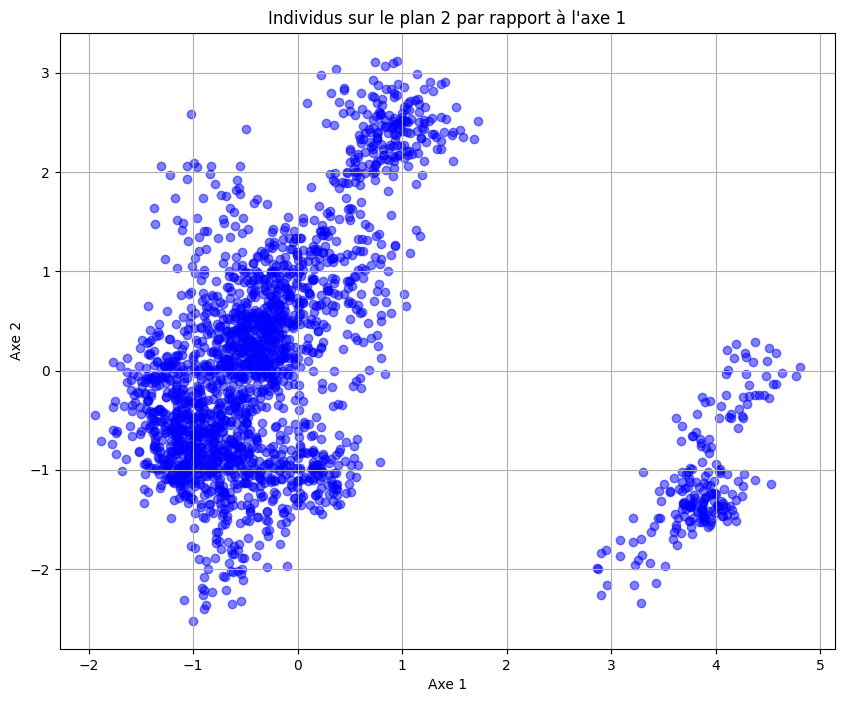

In [ ]:
# Extraction des coordonnées des individus sur les axes 1 et 2
x = indiv_coord_axe[:, 0]
y = indiv_coord_axe[:, 1]

# Affichage des individus sur le plan 2 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.title('Individus sur le plan 2 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

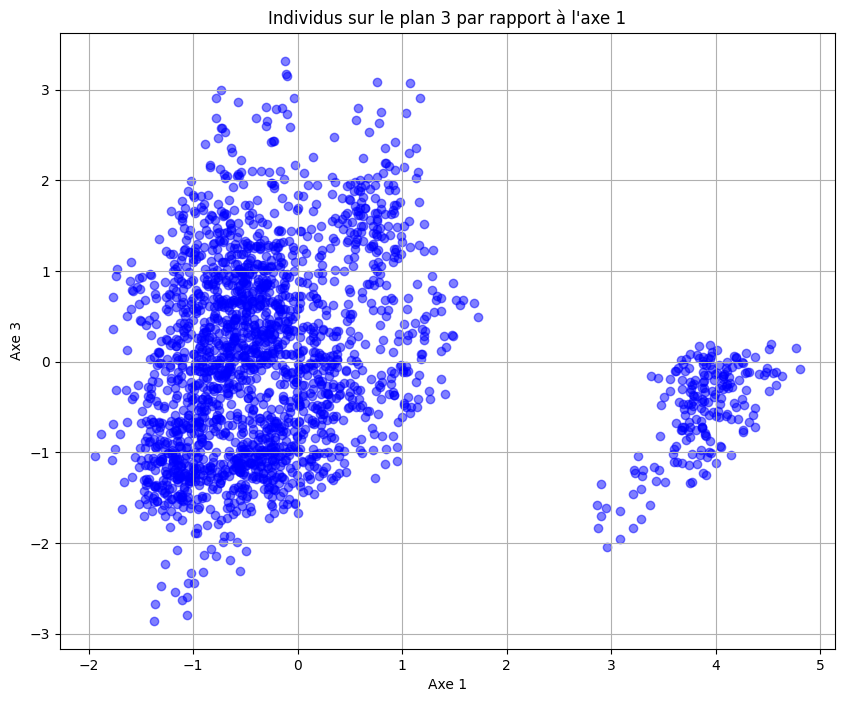

In [ ]:
# Extraction des coordonnées des individus sur les axes 1 et 3
x = indiv_coord_axe[:, 0]
y = indiv_coord_axe[:, 2]

# Affichage des individus sur le plan 3 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 3')
plt.title('Individus sur le plan 3 par rapport à l\'axe 1')
plt.grid(True)
plt.show()


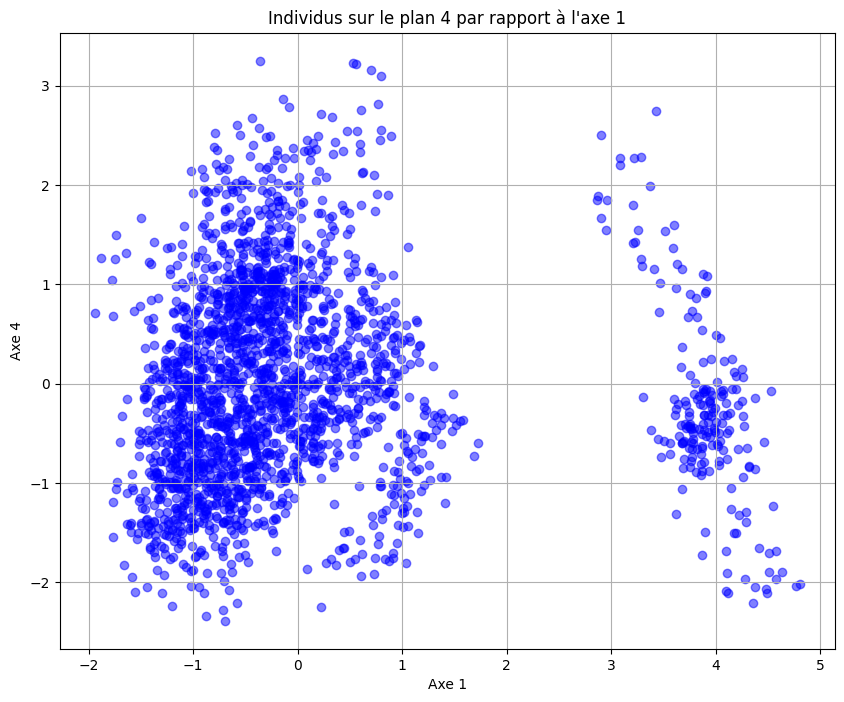

In [ ]:
# Extraction des coordonnées des individus sur les axes 1 et 4
x = indiv_coord_axe[:, 0]
y = indiv_coord_axe[:, 3]

# Affichage des individus sur le plan 4 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 4')
plt.title('Individus sur le plan 4 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

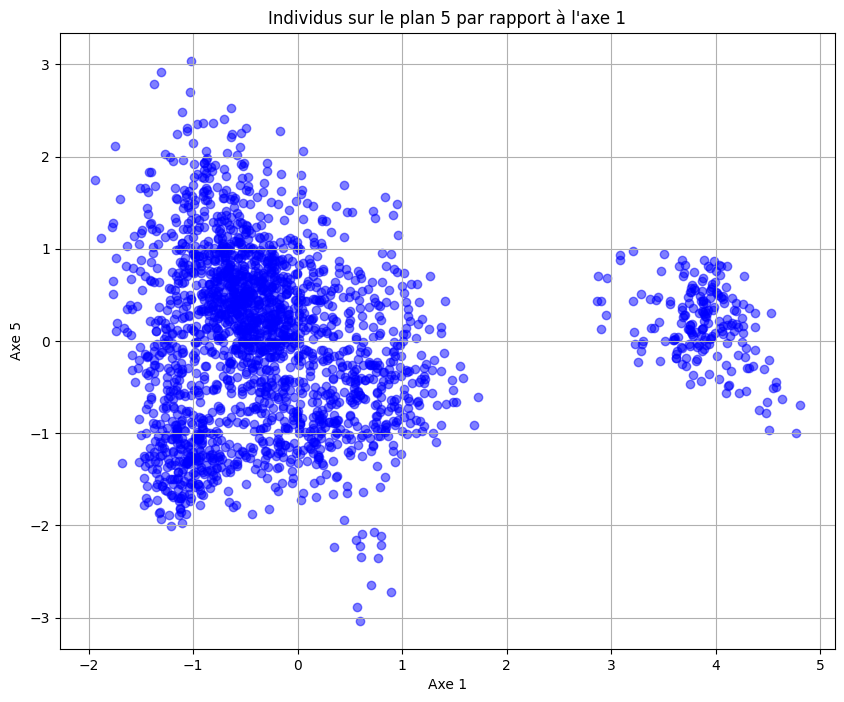

In [ ]:
# Extraction des coordonnées des individus sur les axes 1 et 5
x = indiv_coord_axe[:, 0]
y = indiv_coord_axe[:, 4]

# Affichage des individus sur le plan 5 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 5')
plt.title('Individus sur le plan 5 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

In [ ]:
#********************************Représentation graphique pour les individus****************************

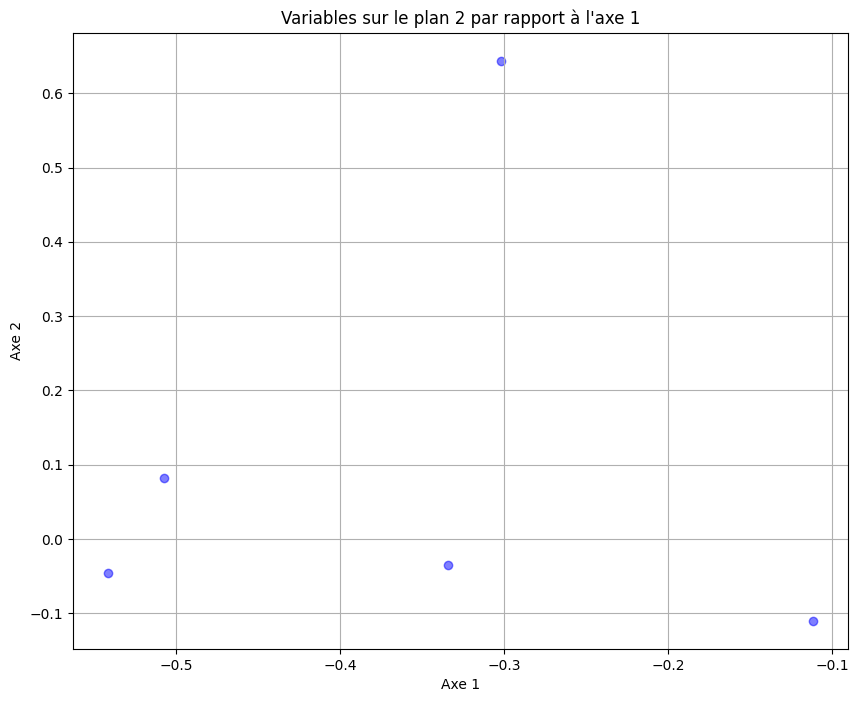

In [ ]:
# Extraction des coordonnées des variables sur les axes 1 et 2
x = var_coord_axe[:, 0]
y = var_coord_axe[:, 1]

# Affichage des variables sur le plan 2 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.title('Variables sur le plan 2 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

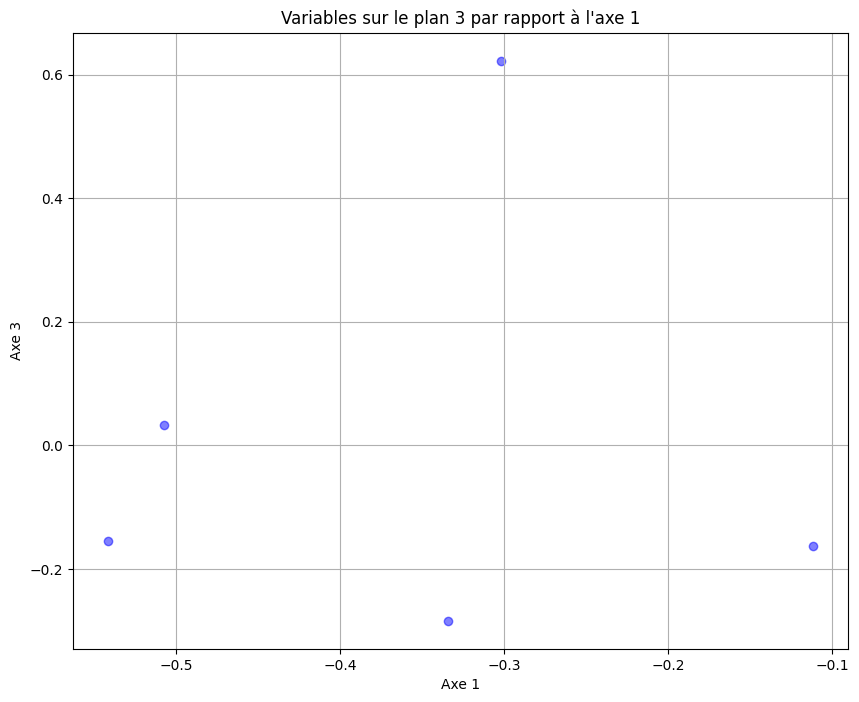

In [ ]:
# Extraction des coordonnées des variables sur les axes 1 et 3
x = var_coord_axe[:, 0]
y = var_coord_axe[:, 2]

# Affichage des variables sur le plan 3 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 3')
plt.title('Variables sur le plan 3 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

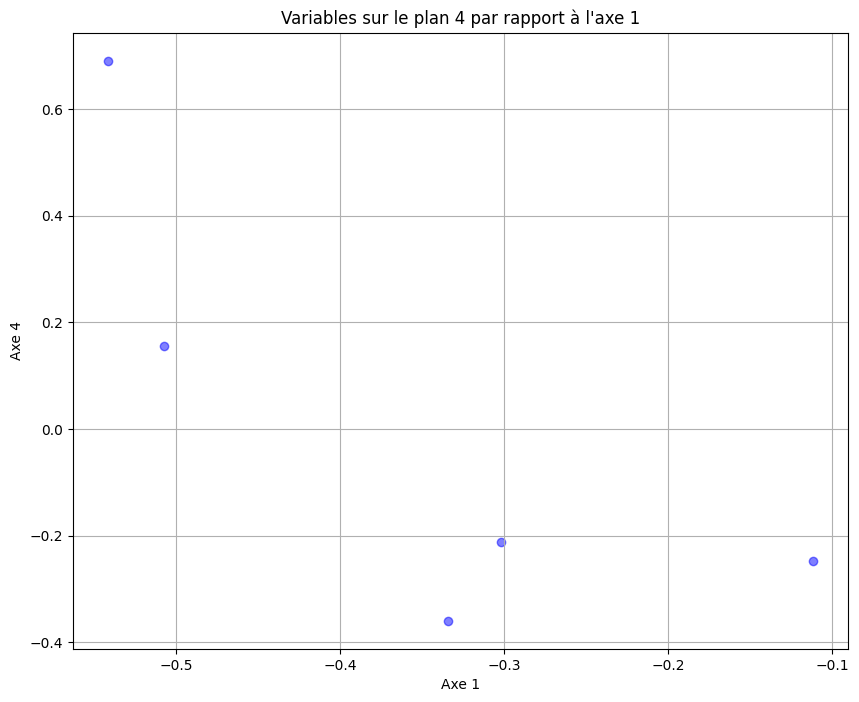

In [ ]:
# Extraction des coordonnées des variables sur les axes 1 et 4
x = var_coord_axe[:, 0]
y = var_coord_axe[:, 3]

# Affichage des variables sur le plan 4 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 4')
plt.title('Variables sur le plan 4 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

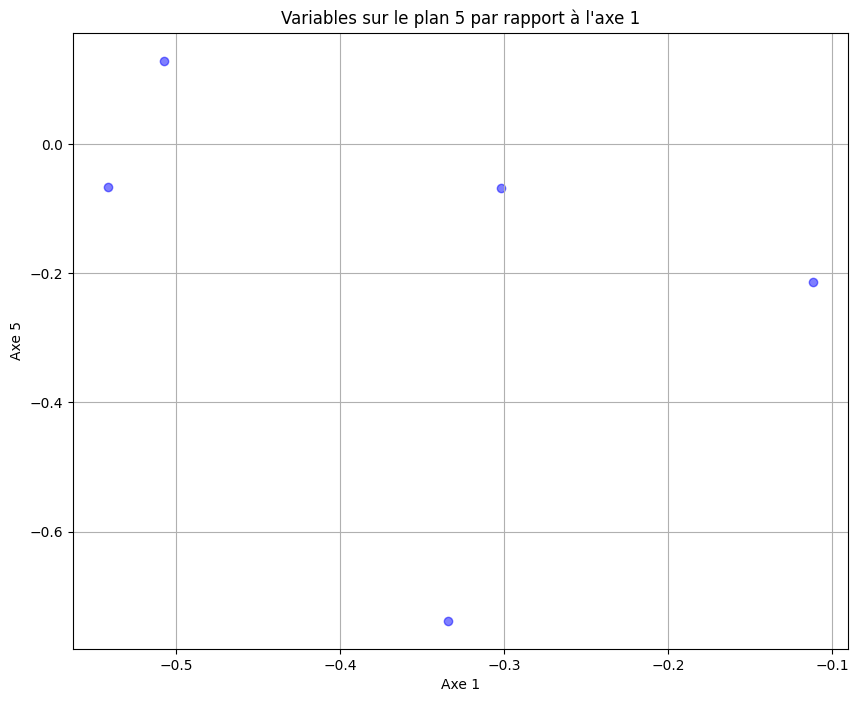

In [ ]:
# Extraction des coordonnées des variables sur les axes 1 et 5
x = var_coord_axe[:, 0]
y = var_coord_axe[:, 4]

# Affichage des variables sur le plan 5 par rapport à l'axe 1
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Axe 1')
plt.ylabel('Axe 5')
plt.title('Variables sur le plan 5 par rapport à l\'axe 1')
plt.grid(True)
plt.show()

In [ ]:
#************************Synthése*************************************

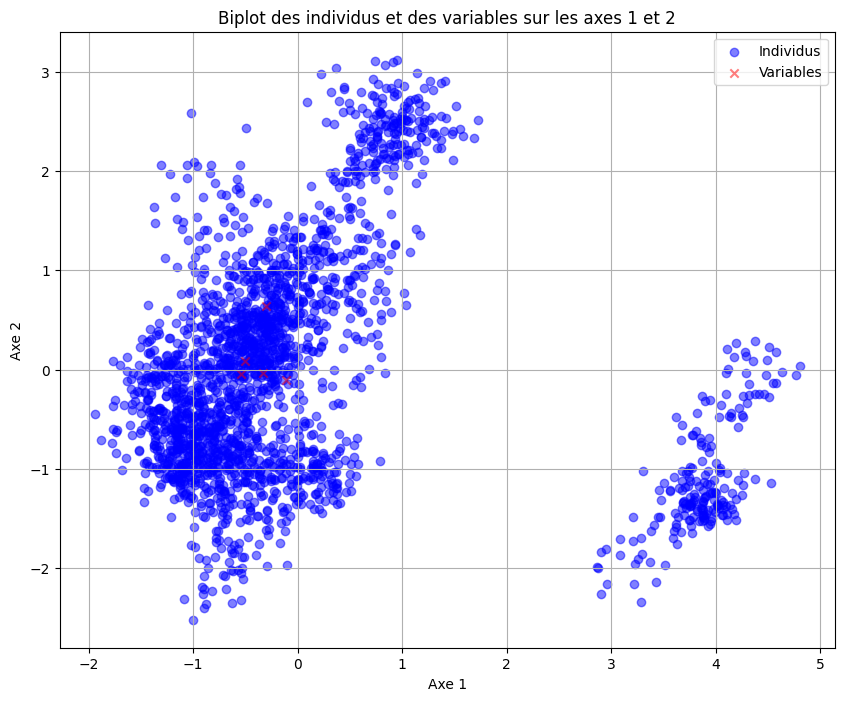

In [ ]:
x_ind = indiv_coord_axe[:, 0]
y_ind = indiv_coord_axe[:, 1]
x_var = var_coord_axe[:, 0]
y_var = var_coord_axe[:, 1]

# Création du biplot
plt.figure(figsize=(10, 8))
plt.scatter(x_ind, y_ind, c='blue', alpha=0.5, label='Individus')
plt.scatter(x_var, y_var, c='red', alpha=0.5, marker='x', label='Variables')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.title('Biplot des individus et des variables sur les axes 1 et 2')
plt.legend()
plt.grid(True)
plt.show()

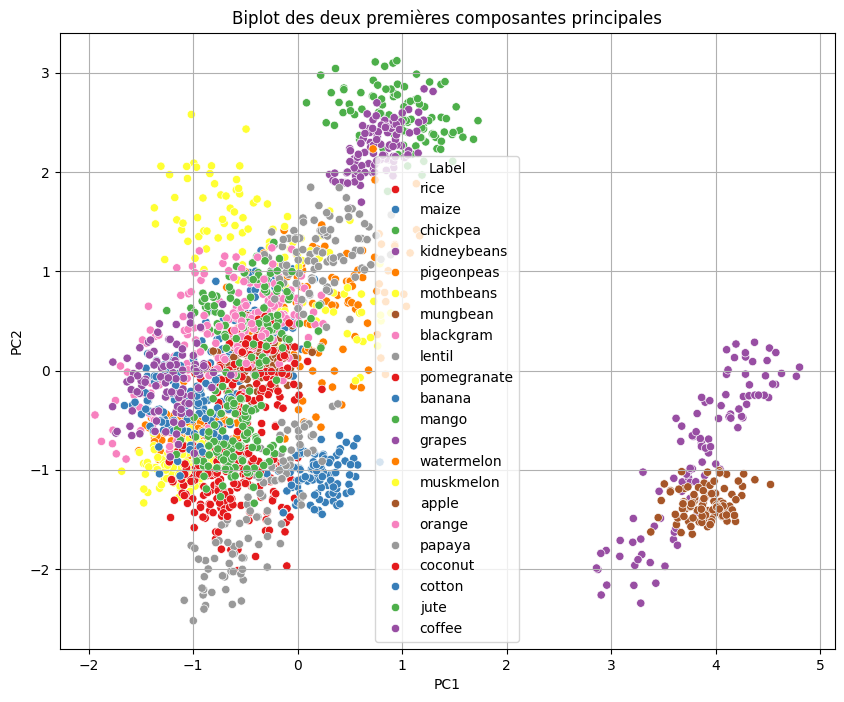

In [ ]:
# Tracer un biplot des deux premières composantes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=principal_df, palette='Set1')
plt.title('Biplot des deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [ ]:
# Afficher la variance expliquée par chaque composante principale
print("Variance expliquée par chaque composante principale :")
print(pca.explained_variance_ratio_)

Variance expliquée par chaque composante principale :
[0.27588831 0.18484431 0.15378704 0.14612731 0.11513263]


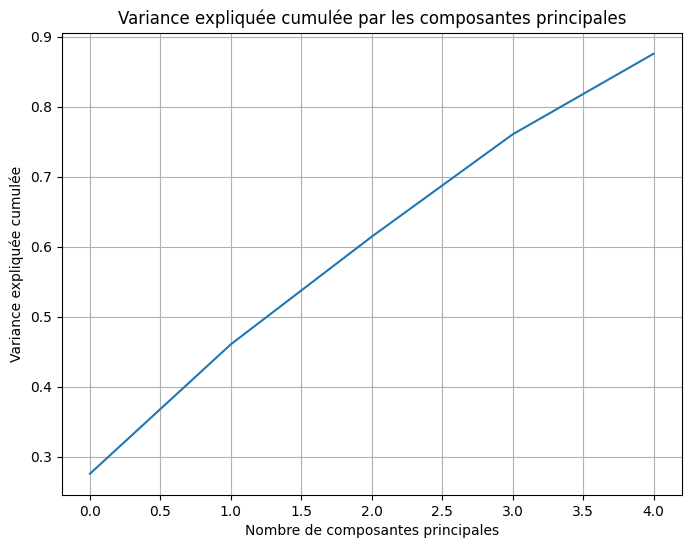

In [ ]:
# Tracer le graphique de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.grid(True)
plt.show()

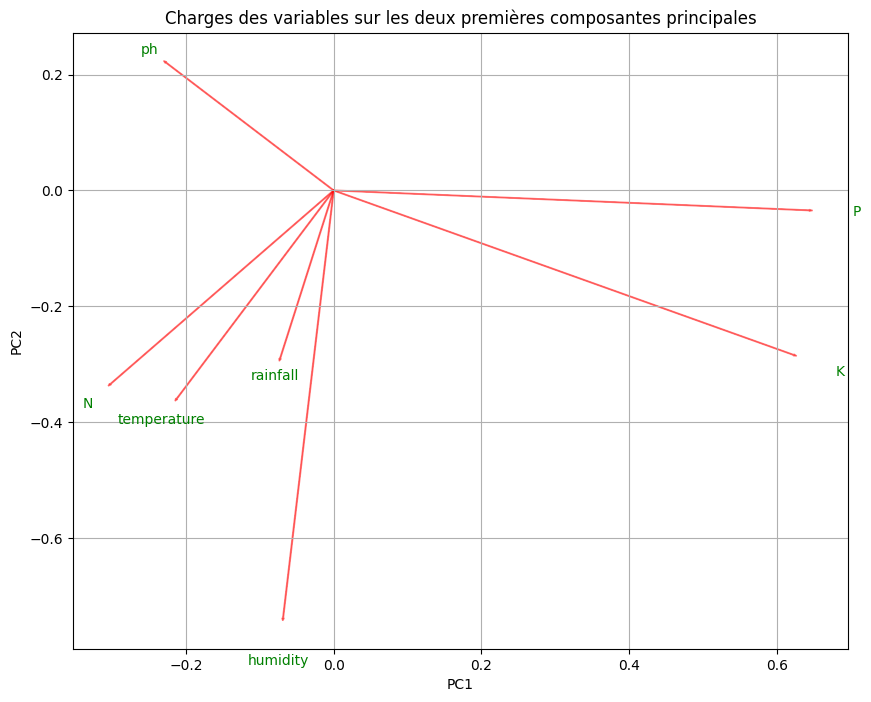

In [ ]:
# Tracer les charges des variables sur les deux premières composantes principales
plt.figure(figsize=(10, 8))
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.5)
    plt.text(pc1*1.1, pc2*1.1, X.columns[i], color='g', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Charges des variables sur les deux premières composantes principales')
plt.grid(True)
plt.show()

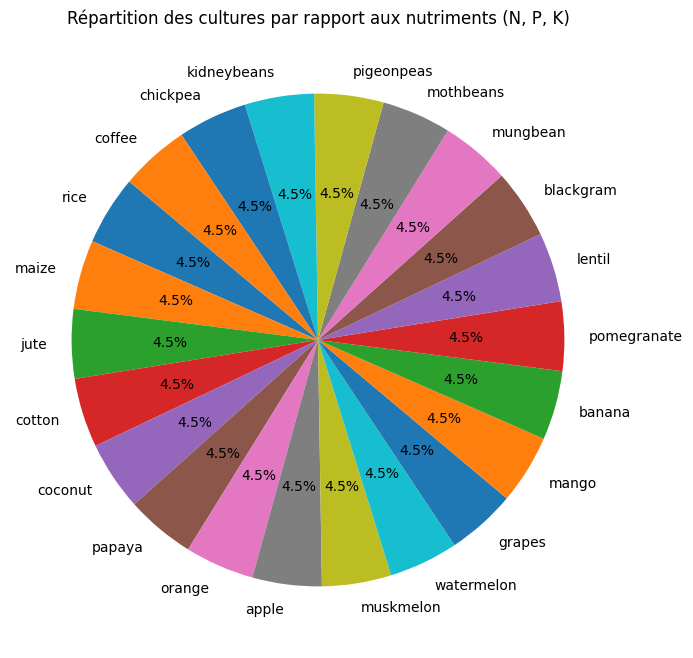

In [ ]:
# Tracer le diagramme circulaire pour la répartition des cultures par rapport aux nutriments (N, P, K)
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des cultures par rapport aux nutriments (N, P, K)')
plt.show()